# Oil Model

You can create `Oil`, `Gas` and `Water` Python Objects that contain the main information that allow to characterize the fluid. They can contain, PVT, Chromatography, gravity among other values specific to the fluid. 

By creating an `Oil` object you can obtain a PVT table throughout common correlations described by Ahmed (Reservoir Engineering Handbook & Equation of State and PVT Analysis ) and by Banzer (Correlaciones Numéricas PVT)


In [3]:
from pvtpy.pvt import PVT
import pvtpy.black_oil as bk
from pvtpy.fluids import Oil, InitialConditions
from pvtpy.units import Pressure, Temperature
import numpy as np
import pandas as pd
import seaborn as sns

## Initial Conditions.

It is required to provide initial conditions 

In [4]:
init = InitialConditions(pressure=Pressure(value=3600), temperature=Temperature(value=160))

In [5]:
oil1 = Oil(
    initial_conditions=init,
    api = 31,
    rsb = 675,
    sg_gas = 0.95
)
oil1

Oil(initial_conditions=InitialConditions(pressure=Pressure(value=3600.0, unit=<PressureUnits.psi: 'psi'>), temperature=Temperature(value=160.0, unit=<TemperatureUnits.farenheit: 'farenheit'>)), pvt=None, chromatography=None, api=31.0, sulphur=None, pb=None, rsb=675.0, sg_gas=0.95)

Once created an Oil object without a PVT, you can generate a tabulated table with the main properties using PVT correlations. 

To set the the correlations to be used initialize an instance of `bk.SetOilCorrelations'. By default it has certain correlations 

In [6]:
cor = bk.SetOilCorrelations()
cor.dict()

{'pb': <pb_correlations.standing: 'standing'>,
 'rs': <rs_correlations.standing: 'standing'>,
 'bo': <bo_correlations.standing: 'standing'>,
 'co_above': <co_above_correlations.vazquez_beggs: 'vazquez_beggs'>,
 'co_below': <co_below_correlations.mccain: 'mccain'>,
 'muod': <muod_correlations.beal: 'beal'>,
 'muo_above': <muo_above_correlations.beal: 'beal'>,
 'muo_below': <muo_below_correlations.beggs: 'beggs'>,
 'rho': <rho_correlations.banzer: 'banzer'>}

In [7]:
oil1.pvt_from_correlation(start_pressure=20, end_pressure=5000, n=20, correlations=cor)

print(oil1.pvt.df())

                     rs        bo        co       muo        rho
pressure                                                        
20.000000      5.602383  1.047588  0.018631  3.330836  51.875318
282.105263    56.044317  1.070135  0.000401  2.436717  51.335948
544.210526   117.767263  1.098994  0.000155  1.866558  50.638004
806.315789   185.809048  1.132172  0.000088  1.504645  49.838031
1068.421053  258.458881  1.168944  0.000058  1.259988  48.964359
1330.526316  334.795512  1.208885  0.000042  1.085106  48.037661
1592.631579  414.232449  1.251699  0.000033  0.954407  47.074201
1854.736842  496.359618  1.297160  0.000026  0.853222  46.087010
2116.842105  580.872327  1.345091  0.000022  0.772638  45.086554
2378.947368  667.534273  1.395343  0.000018  0.706964  44.081202
2641.052632  674.929091  1.399680  0.000015  0.717353  43.910709
2903.157895  674.929091  1.399680  0.000014  0.729161  43.768090
3165.263158  674.929091  1.399680  0.000013  0.740968  43.649446
3427.368421  674.929091  

In [8]:
oil1.pvt.interpolate([500,1500,2500,3500])

,rs,bo,co,muo,rho
pressure,,,,,
500,107.356163,1.094126,0.000196,1.962729,50.755729
1500,386.158351,1.236568,0.000036,1.000598,47.414701
2500,670.949550,1.397346,0.000017,0.711762,44.002460
3500,674.929091,1.399680,0.000011,0.756048,43.525419


array([<AxesSubplot:xlabel='pressure'>, <AxesSubplot:xlabel='pressure'>,
       <AxesSubplot:xlabel='pressure'>, <AxesSubplot:xlabel='pressure'>,
       <AxesSubplot:xlabel='pressure'>], dtype=object)

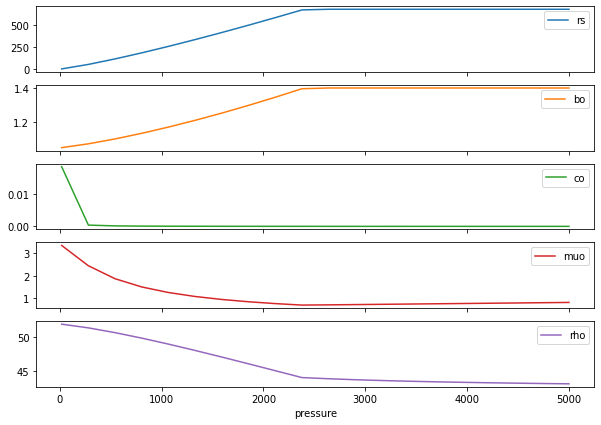

In [9]:
oil1.pvt.df().plot(subplots=True, figsize=(10,7))

In [10]:
print(oil1.to_ecl())

-- OIL PVT TABLE FOR LIVE OIL
PVTO
-- rs      pres  bo      visc
-- Mscf/rb psi   RB/STB  cP  
-- ------- ----  ----    ---- 
0.006 20.000 1.048 3.331/
0.057 284.559 1.070 2.431/
0.119 549.119 1.100 1.860/
0.188 813.678 1.133 1.498/
0.261 1078.238 1.170 1.253/
0.339 1342.797 1.211 1.079/
0.419 1607.356 1.254 0.949/
0.502 1871.916 1.300 0.848/
0.587 2136.475 1.349 0.768/
0.668 2401.035 1.396 0.708
-- Unsaturated Data
2920.828 1.400 0.730
3440.621 1.400 0.753
3960.414 1.400 0.777
4480.207 1.400 0.800
5000.000 1.400 0.824/
/
